In [321]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [322]:
df = pd.read_csv("advertising.csv")
df_original = df.copy()
df_original

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data Exploration

In [323]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [324]:
# Display the last few rows of the dataset
print("\nLast 5 rows of the dataset:")
print(df.tail())


Last 5 rows of the dataset:
        TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4


In [325]:
# Display the basic information about the dataset (column names, non-null counts, data types)
print("\nBasic information about the dataset:")
print(df.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [326]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [327]:
# Check the shape of the dataset (number of rows and columns)
print("\nShape of the dataset (rows, columns):")
print(df.shape)


Shape of the dataset (rows, columns):
(200, 4)


In [328]:
# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [329]:
# Display the number of unique values per column
print("\nUnique values per column:")
print(df.nunique())


Unique values per column:
TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64


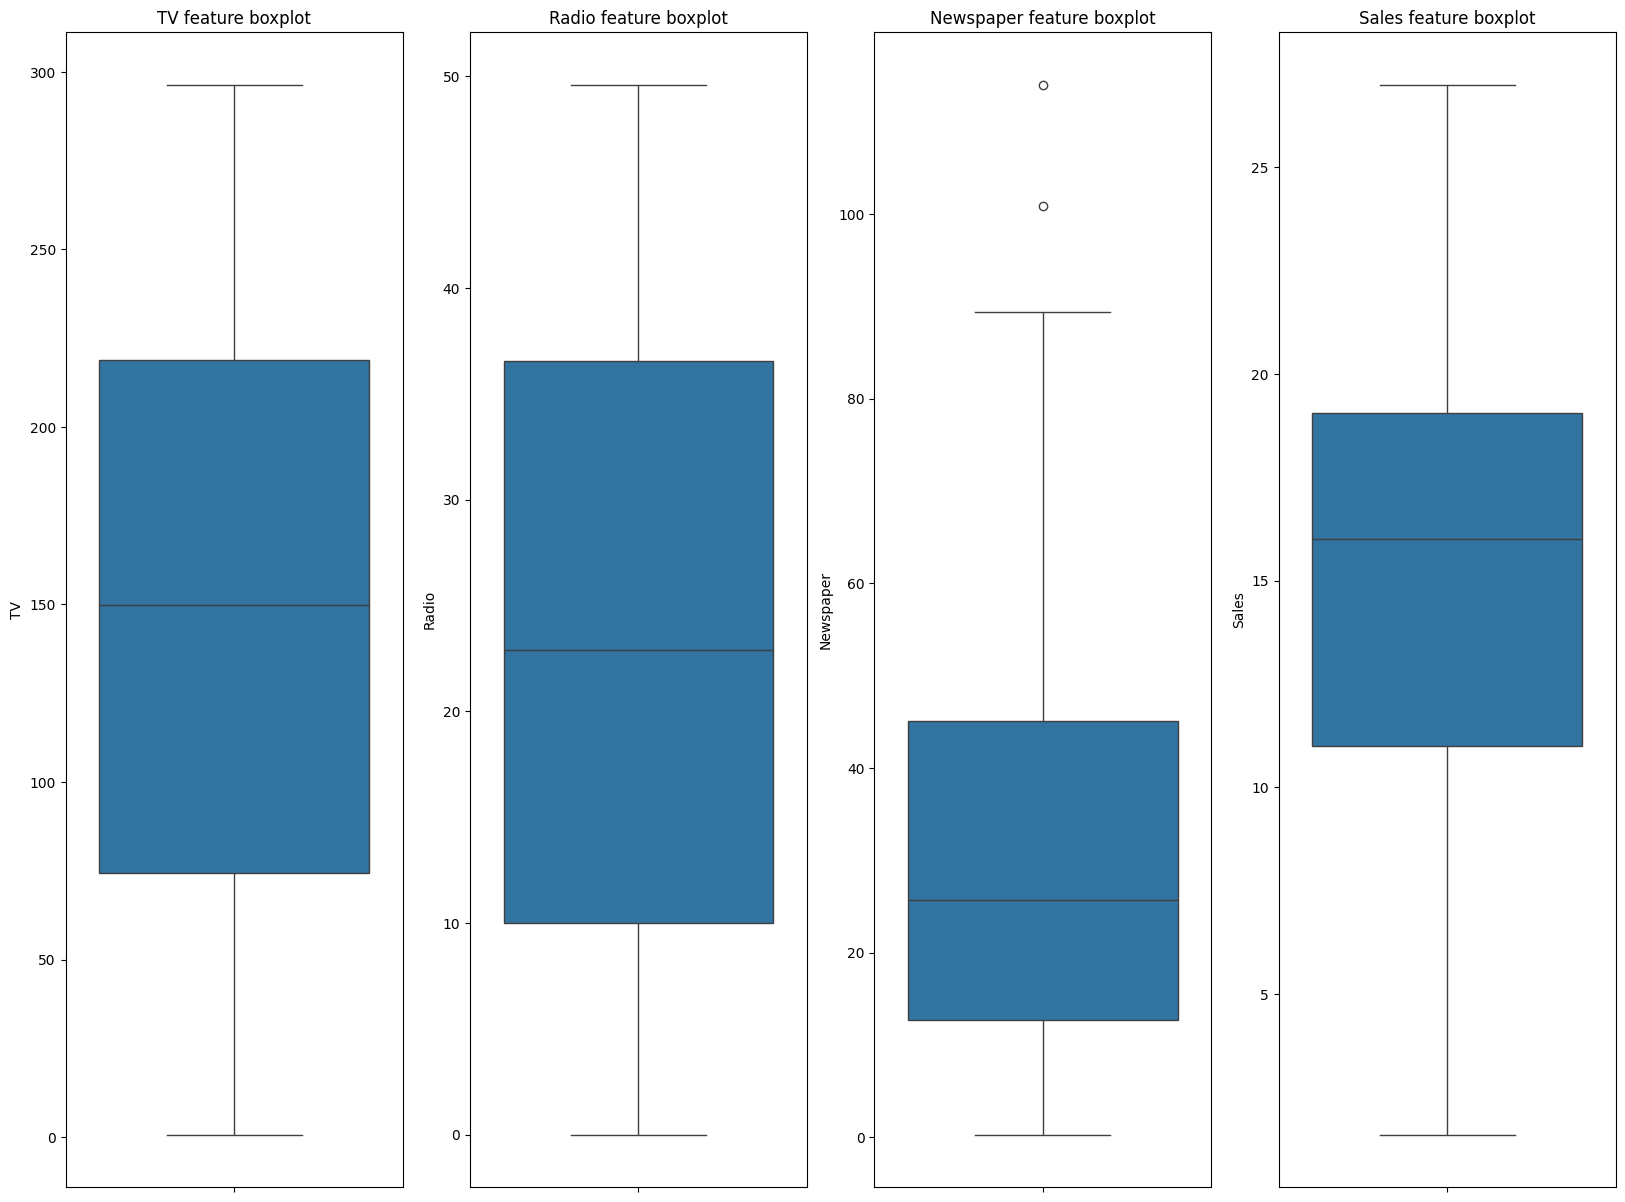

In [330]:
plt.figure(figsize=(20, 15))

#Subplot 1:
plt.subplot(1, 4, 1)
sns.boxplot(y='TV' , data=df)
plt.title('TV feature boxplot')

# Subplot 2: 
plt.subplot(1, 4, 2)
sns.boxplot(y='Radio' , data=df)
plt.title('Radio feature boxplot')

# Subplot 3: 
plt.subplot(1, 4, 3)
sns.boxplot(y='Newspaper' , data=df)
plt.title('Newspaper feature boxplot')

# Subplot 4:
plt.subplot(1, 4, 4) 
sns.boxplot(y='Sales' , data=df)
plt.title('Sales feature boxplot')

plt.show()

In [331]:
#dropping outiers in Newspaper feature
df=df[ df["Newspaper"] < 100 ]

In [332]:
# Display the correlation matrix (for numerical data)
print("\nCorrelation matrix:")
print(df.corr())


Correlation matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.051978   0.049771  0.899974
Radio      0.051978  1.000000   0.346364  0.348566
Newspaper  0.049771  0.346364   1.000000  0.151764
Sales      0.899974  0.348566   0.151764  1.000000


In [333]:
print(" 'TV' feature correlates more with the sales with correlation of  0.899 ")

 'TV' feature correlates more with the sales with correlation of  0.899 


# linear regression model

In [334]:
#fit a linear regression model with the chosen feature as input and sales as output
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x=df["TV"].values.reshape(-1, 1)
y=df["Sales"].values
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
reg.fit(X_train, y_train)
predictions = reg.predict(X_train)


print("\nR-squared:")
print(reg.score(X_train, y_train))

print("\nRMSE:")
print(mean_squared_error(y_train, predictions, squared=False))





R-squared:
0.7909806914725315

RMSE:
2.373075482239586


/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Cross-Validation

In [335]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X_train, y_train, cv=kf)
print(cv_results)
print("the mean:"+str(np.mean(cv_results)))
print("the std:"+str(np.std(cv_results)))
print("quantile:")
print(np.quantile(cv_results, [0.025, 0.975]))

[0.68198734 0.77739128 0.83565445 0.63731137 0.81823755 0.71938772]
the mean:0.7449949523669442
the std:0.07171074895041214
quantile:
[0.64289586 0.83347734]
